# Pandas
Librería de python para leer, escribir y manipular datos
https://pandas.pydata.org/docs/user_guide/index.html#user-guide

In [1]:
import pandas as pd
import numpy as np

## Series en pandas
Son de una dimensión y permiten almacenar distintos tipos de datos en la misma Serie.

Un objeto Series tiene dos componentes principales: un índice y un vector de datos. Ambos componentes son listas con la misma longitud. El índice contiene valores únicos y, por lo general, ordenados, y se usa para acceder a valores individuales de los datos.

In [3]:
#Series a partir de listas
etiquetas = ['a', 'b', 'c']
datos = [1, 2, 3]

pd.Series(data=datos, index=etiquetas)

a    1
b    2
c    3
dtype: int64

In [4]:
#Series a partir de npArrays
array = np.arange(5,8)
etiquetas = ['venta1', 'venta2', 'venta3']
serie = pd.Series(array, etiquetas)
serie

venta1    5
venta2    6
venta3    7
dtype: int32

In [5]:
#Acceder a datos por etiqueta
serie['venta1']

5

In [6]:
#Acceder a datos por posición
serie[1]

6

In [7]:
#Serie con distintos tipos de datos
datos2 = ['hola', 300, 'string', 20]
pd.Series(datos2)

0      hola
1       300
2    string
3        20
dtype: object

## DataFrames en pandas
Se utiliza para guardar tablas de datos. Se puede considerar una lista de vectores de igual longitud que no tienen por qué ser del mismo tipo.

Dicho de otra manera, es una colección ordenada de columnas con nombres y tipos, parecido a una tabla de base de datos, donde una sola fila representa un único caso (ejemplo) y las columnas representan atributos particulares.

In [8]:
filas = ['ventas1', 'ventas2', 'ventas3']
columnas = ['zonaA', 'zonaB', 'zonaC']
datos = [[123,456,789], [234,567,891], [543,986,324]]

In [9]:
dataframe = pd.DataFrame(datos,filas,columnas)
dataframe

,zonaA,zonaB,zonaC
ventas1,123,456,789
ventas2,234,567,891
ventas3,543,986,324


In [10]:
#Selección por filas
dataframe.loc[['ventas1','ventas2']]

,zonaA,zonaB,zonaC
ventas1,123,456,789
ventas2,234,567,891


In [11]:
#Selección por columnas
dataframe['zonaA']

ventas1    123
ventas2    234
ventas3    543
Name: zonaA, dtype: int64

In [12]:
dataframe[['zonaA', 'zonaB']]

,zonaA,zonaB
ventas1,123,456
ventas2,234,567
ventas3,543,986


In [13]:
#Selección por elementos
dataframe.loc['ventas1']['zonaA']

123

In [14]:
#Añadir columnas nuevas
dataframe['suma zonas'] = dataframe['zonaA'] + dataframe['zonaB'] + dataframe['zonaC']
dataframe

,zonaA,zonaB,zonaC,suma zonas
ventas1,123,456,789,1368
ventas2,234,567,891,1692
ventas3,543,986,324,1853


In [15]:
#Borrar datos del dataframe
dataframe.drop('suma zonas', axis = 1, inplace=True) #axis 1 es vertical, inplace borrado permanente
dataframe

,zonaA,zonaB,zonaC
ventas1,123,456,789
ventas2,234,567,891
ventas3,543,986,324


In [16]:
dataframe.shape

(3, 3)

In [17]:
#Modificación de filas
nueva_fila = 'dia1 dia2 dia3'.split() #Separa en espacio en blanco
nueva_fila

['dia1', 'dia2', 'dia3']

In [23]:
dataframe['dias'] = nueva_fila
dataframe

,zonaA,zonaB,zonaC,dias
dias,,,,
dia1,123,456,789,dia1
dia2,234,567,891,dia2
dia3,543,986,324,dia3


In [25]:
#Cambiar índice
dataframe = dataframe.set_index('dias')
dataframe

,zonaA,zonaB,zonaC
dias,,,
dia1,123,456,789
dia2,234,567,891
dia3,543,986,324


### Tratamiento datos nulos en DataFrames

In [29]:
diccionario = {'A':[4,5,np.nan], 'B':[6,5,1], 'C':[np.nan,3,np.nan]}

df = pd.DataFrame(diccionario)
df

,A,B,C
0,4.0,6,NaN
1,5.0,5,3.0
2,NaN,1,NaN


In [30]:
#Eliminar filas con valores no nulos
df.dropna()

,A,B,C
1,5.0,5,3.0


In [31]:
#Eliminar columnas con valores no nulos
df.dropna(axis=1)

,B
0,6
1,5
2,1


In [32]:
#Rellenar valores nulos con valor por defecto
df.fillna(value=100)

,A,B,C
0,4.0,6,100.0
1,5.0,5,3.0
2,100.0,1,100.0


In [33]:
#Rellenar valores nulos con la media
media = df.mean()
df.fillna(value=media)

,A,B,C
0,4.0,6,3.0
1,5.0,5,3.0
2,4.5,1,3.0


### Agrupación de datos en DataFrames 

Función groupby()

In [116]:
#Creación de un dataframe
df = pd.DataFrame({'A': [1, 1, 2, 1, 2],
                   'B': [np.nan, 2, 3, 4, 5],
                   'C': [1, 2, 1, 1, 2]}, columns=['A', 'B', 'C'])
df

,A,B,C
0,1,NaN,1
1,1,2.0,2
2,2,3.0,1
3,1,4.0,1
4,2,5.0,2


In [117]:
#Agrupa todos los coincidentes de la col A y calcula la media de las demás cols
df.groupby(['A']).mean()

,B,C
A,,
1,3.0,1.333333
2,4.0,1.500000


In [110]:
#Muestra info estadística de la agrupación
df.groupby('A').describe()

B                                             C                      \
  count mean       std  min  25%  50%  75%  max count      mean       std   
A                                                                           
1   2.0  3.0  1.414214  2.0  2.5  3.0  3.5  4.0   3.0  1.333333  0.577350   
2   2.0  4.0  1.414214  3.0  3.5  4.0  4.5  5.0   2.0  1.500000  0.707107   

                              
   min   25%  50%   75%  max  
A                             
1  1.0  1.00  1.0  1.50  2.0  
2  1.0  1.25  1.5  1.75  2.0

In [111]:
#Agrupa todos los coincidentes de la col A y calcula la media de la col B
df.groupby('A')['B'].mean()

A
1    3.0
2    4.0
Name: B, dtype: float64

Función concat()

In [2]:
#Creación de un dataframe
df = pd.DataFrame('A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]}, columns=['A', 'B', 'C'])
df

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [3]:
df2 = pd.DataFrame({'A': [10, 20, 30],
                   'B': [40, 50, 60],
                   'C': [70, 80, 90]}, columns=['A', 'B', 'C'])
df2

,A,B,C
0,10,40,70
1,20,50,80
2,30,60,90


In [5]:
#Concatenar en eje vertical 
pd.concat([df, df2])

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
0,10,40,70
1,20,50,80
2,30,60,90


In [6]:
#Concatenar en eje horizontal 
pd.concat([df, df2], axis=1)

,A,B,C,A,B,C
0,1,4,7,10,40,70
1,2,5,8,20,50,80
2,3,6,9,30,60,90


Función merge()

In [12]:
df = pd.DataFrame({'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9], 'clave':['c1', 'c2', 'c3']})

df2 = pd.DataFrame({'E': [1, 2, 3],
                   'F': [4, 5, 6],
                   'G': [7, 8, 9], 'clave':['c1', 'c2', 'c3']})

In [14]:
#Unir en base a la columna 'clave'
pd.merge(df,df2, on='clave')

,A,B,C,clave,E,F,G
0,1,4,7,c1,1,4,7
1,2,5,8,c2,2,5,8
2,3,6,9,c3,3,6,9


Función join()

In [19]:
df = pd.DataFrame({'A': [1, 2, 3,7],
                   'B': [4, 5, 6,8]}, index=['c1','c2','c3','c4'])

df2 = pd.DataFrame({'C': [1, 2, 3],
                   'D': [4, 5, 6]}, index=['c1','c2','c3'])

In [20]:
#Unión de dataframes
df.join(df2)
#completa los vacíos con nulos

,A,B,C,D
c1,1,4,1.0,4.0
c2,2,5,2.0,5.0
c3,3,6,3.0,6.0
c4,7,8,NaN,NaN


## Cargando datos de archivos

### '.csv'

In [40]:
file_path = 'https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv'

In [41]:
df = pd.read_csv(file_path) #lectura del archivo csv 'sbux.csv'

In [42]:
type(df) #Se importa como un DataFrame

pandas.core.frame.DataFrame

In [43]:
df.head() #muestra los primeros 5 valores del dataset por defecto

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [44]:
df.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX
5,2013-02-15,27.805,27.850,27.085,27.170,18195730,SBUX
6,2013-02-19,27.180,27.305,27.010,27.225,11760912,SBUX
7,2013-02-20,27.300,27.420,26.590,26.655,12472506,SBUX
8,2013-02-21,26.535,26.820,26.260,26.675,13896450,SBUX
9,2013-02-22,26.850,27.105,26.640,27.085,11487316,SBUX


In [45]:
df.tail() #muestra los últimos 5 valores del dataset por defecto

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


### '.xlsx'

In [21]:
#Conocer directorio actual
pwd

'C:\\Users\\cecim\\codigo - python para datascience'

In [23]:
ls

 El volumen de la unidad C es Windows-SSD
 El n£mero de serie del volumen es: 8C07-78C5

 Directorio de C:\Users\cecim\codigo - python para datascience

16/03/2021  11:04 a.m.    <DIR>          .
16/03/2021  11:04 a.m.    <DIR>          ..
14/03/2021  11:25 a.m.    <DIR>          .ipynb_checkpoints
16/03/2021  11:04 a.m.             7.719 ejemplo_excel.xlsx
04/03/2021  10:27 a.m.            30.747 flor.jpg
04/03/2021  10:36 a.m.             8.246 lena.jfif
04/03/2021  11:29 a.m.           200.300 Matplotlib ejercicio.ipynb
09/03/2021  10:53 a.m.           931.932 Matplotlib.ipynb
06/03/2021  12:49 p.m.            37.200 Numpy .ipynb
05/03/2021  03:44 p.m.            16.706 output.csv
16/03/2021  11:04 a.m.           185.322 Pandas.ipynb
               8 archivos      1.418.172 bytes
               3 dirs  351.645.986.816 bytes libres


In [47]:
dfa = pd.read_excel('ejemplo_excel.xlsx')
dfa

,Unnamed: 0,a,b,c,d
0,0,0,1,2,3
1,1,4,5,6,7
2,2,8,9,10,11
3,3,12,13,14,15


In [29]:
dfa.set_index(	'Unnamed: 0')

,a,b,c,d
Unnamed: 0,,,,
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [48]:
dfa.to_excel('salida_excel.xlsx')

### Ficheros 'html'

In [31]:
pagina_web = 'https://es.wikipedia.org/wiki/Demograf%C3%ADa_de_Argentina'

In [33]:
datos = pd.read_html(pagina_web)

In [34]:
type(datos)

list

In [36]:
datos[0]

,Provincia,Población en 2010[12]​
0,Provincia de Buenos Aires,15.594.428
1,Córdoba,3.304.825
2,Santa Fe,3.300.736
3,Ciudad Autónoma de Buenos Aires,2.891.082
4,Mendoza,1.741.610
5,Tucumán,1.592.878
6,Entre Ríos,1.236.300
7,Salta,1.215.207
8,Misiones,1.097.829
9,Chaco,1.053.466


In [49]:
dfh = datos[0]

In [50]:
dfh.head(10)

,Provincia,Población en 2010[12]​
0,Provincia de Buenos Aires,15.594.428
1,Córdoba,3.304.825
2,Santa Fe,3.300.736
3,Ciudad Autónoma de Buenos Aires,2.891.082
4,Mendoza,1.741.610
5,Tucumán,1.592.878
6,Entre Ríos,1.236.300
7,Salta,1.215.207
8,Misiones,1.097.829
9,Chaco,1.053.466


### Selección de datos por columnas

In [51]:
df.columns #devuelve los nombres de cada col

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [52]:
#Para conocer valores se llaman según índice, nombre de columna o fila específica
df['open'] #pide los datos de la columna 'open'

0       27.920
1       28.260
2       28.000
3       28.230
4       27.765
         ...  
1254    56.280
1255    55.900
1256    55.530
1257    53.685
1258    55.080
Name: open, Length: 1259, dtype: float64

In [53]:
df[['open', 'close']] #devuelve los datos de ambas columnas

,open,close
0,27.920,28.185
1,28.260,28.070
2,28.000,28.130
3,28.230,27.915
4,27.765,27.775
...,...,...
1254,56.280,56.000
1255,55.900,55.770
1256,55.530,54.690
1257,53.685,55.610


### Selección de datos por filas

In [54]:
#Selección de filas 
df.iloc[0] 

date      2013-02-08
open           27.92
high          28.325
low            27.92
close         28.185
volume       7146296
Name            SBUX
Name: 0, dtype: object

In [19]:
df.loc[0] 
#iloc[] para ínices enteros únicamente.loc[] para seleccionar por el label (en este caso coinciden)

date      2013-02-08
open           27.92
high          28.325
low            27.92
close         28.185
volume       7146296
name            SBUX
Name: 0, dtype: object

In [21]:
#volvemos a cargar el dataframe para ver que lo de loc e iloc
df2 = pd.read_csv(file_path, index_col='date') #la columna date pasa ahora a ser el índice 

In [22]:
df2.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [23]:
df2.loc['2013-02-08'] #búsqueda por label con loc[]

open        27.92
high       28.325
low         27.92
close      28.185
volume    7146296
Name         SBUX
Name: 2013-02-08, dtype: object

In [24]:
type(df2.loc['2013-02-08'])

pandas.core.series.Series

### Selección de datos con una condición

In [25]:
#filas con 'open' mayor a 64
df[df['open']>64]  

,date,open,high,low,close,volume,name
1087,2017-06-05,64.85,64.870,64.18,64.27,6809284,SBUX
1088,2017-06-06,64.22,64.350,64.05,64.16,5448439,SBUX
1089,2017-06-07,64.13,64.295,63.34,63.50,8364994,SBUX


In [26]:
#filas con nombre distinto a sbux
df[df['name']!= 'SBUX']

,date,open,high,low,close,volume,name


In [28]:
import numpy as np
A = np.arange(10)
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
A[A % 2 == 0]

array([0, 2, 4, 6, 8])

### Convertir DataFrame en numpyArray

In [31]:
df.values #Extraigo los valores, pero como tengo no numéricos tengo que filtrar que quiero

array([['2013-02-08', 27.92, 28.325, ..., 28.185, 7146296, 'SBUX'],
       ['2013-02-11', 28.26, 28.26, ..., 28.07, 5457354, 'SBUX'],
       ['2013-02-12', 28.0, 28.275, ..., 28.13, 8665592, 'SBUX'],
       ...,
       ['2018-02-05', 55.53, 56.26, ..., 54.69, 16059955, 'SBUX'],
       ['2018-02-06', 53.685, 56.06, ..., 55.61, 17415065, 'SBUX'],
       ['2018-02-07', 55.08, 55.43, ..., 54.46, 13927022, 'SBUX']],
      dtype=object)

In [33]:
A = df[['open', 'close']].values
A

array([[27.92 , 28.185],
       [28.26 , 28.07 ],
       [28.   , 28.13 ],
       ...,
       [55.53 , 54.69 ],
       [53.685, 55.61 ],
       [55.08 , 54.46 ]])

In [34]:
type(A)

numpy.ndarray

### Crear y exportar un archivo '.csv' a partir de filas y columnas existentes

In [37]:
#Guardar las col open y close como un csv 
smalldf = df[['open', 'close']]
smalldf.to_csv('output.csv', index=False)

In [38]:
smalldf.head()

,open,close
0,27.920,28.185
1,28.260,28.070
2,28.000,28.130
3,28.230,27.915
4,27.765,27.775


## Función apply()
Sirve para realizar operaciones en cada fila o en cada columna de un DataFrame. Evita el uso de bucles for para mayor eficacia.

In [46]:
def date_to_year(row):
    return int(row['date'].split('-')[0]) 
#Recibe cada fila, se enfoca en la col 'date', separa en cada '-' y se queda con el primer segmento que lo contiene


df.apply(date_to_year, axis=1) #axis 1 para que sea por filas

0       2013
1       2013
2       2013
3       2013
4       2013
        ... 
1254    2018
1255    2018
1256    2018
1257    2018
1258    2018
Length: 1259, dtype: int64

In [47]:
df['year'] = df.apply(date_to_year, axis=1)

In [48]:
df.head()

,date,open,high,low,close,volume,name,year
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,2013
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,2013
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,2013
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,2013
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,2013


In [54]:
df[df['year'] != 2013]

,date,open,high,low,close,volume,name,year
226,2014-01-02,39.035,39.1350,38.5025,38.585,8528022,SBUX,2014
227,2014-01-03,38.740,38.8850,38.4700,38.475,6545626,SBUX,2014
228,2014-01-06,38.450,38.6750,38.0050,38.085,10604900,SBUX,2014
229,2014-01-07,38.325,38.7050,38.2350,38.605,8180398,SBUX,2014
230,2014-01-08,38.640,39.0735,38.5950,39.015,10190576,SBUX,2014
...,...,...,...,...,...,...,...,...
1254,2018-02-01,56.280,56.4200,55.8900,56.000,14690146,SBUX,2018
1255,2018-02-02,55.900,56.3200,55.7000,55.770,15358909,SBUX,2018
1256,2018-02-05,55.530,56.2600,54.5700,54.690,16059955,SBUX,2018
1257,2018-02-06,53.685,56.0600,53.5600,55.610,17415065,SBUX,2018


## Graficos con Pandas


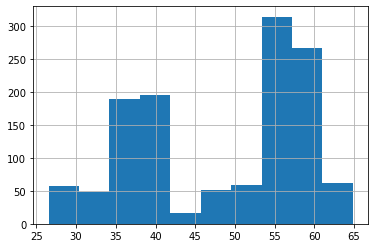

In [55]:
#Histograma de una columna de un dataframe
df['open'].hist(); #.hist(bins=x) para cambiar la cant de columnas 

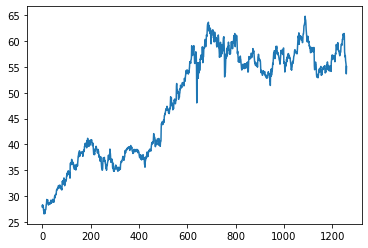

In [57]:
df['open'].plot();

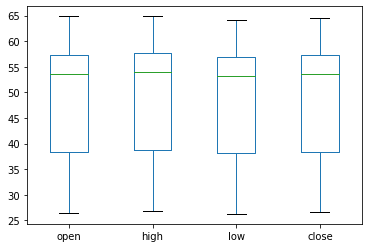

In [58]:
df[['open', 'high', 'low', 'close']].plot.box();

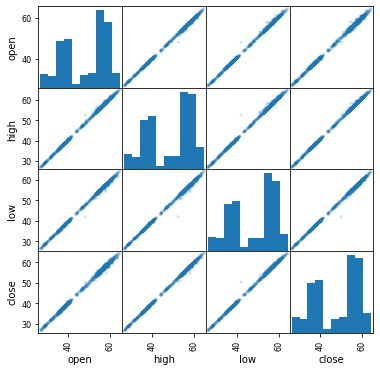

In [60]:
from pandas.plotting import scatter_matrix
#alpha controla la transparecia y figsize el tamaño de las figuras en pulgadas
scatter_matrix(df[['open', 'high', 'low', 'close']], alpha=0.2, figsize=(6, 6));

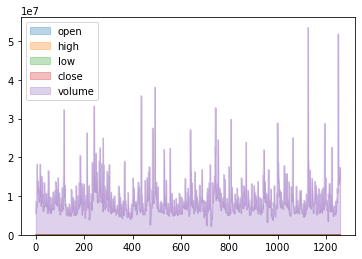

In [58]:
df.plot.area(alpha=0.3);

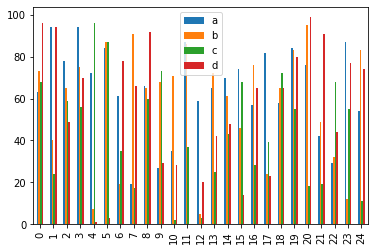

In [65]:
dfex = pd.DataFrame(np.random.randint(100,size=(25,4)), columns=['a','b','c','d'])

dfex.plot.bar();

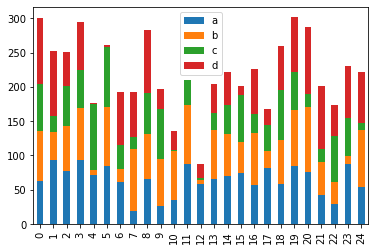

In [66]:
dfex.plot.bar(stacked=True); #gráfico de barras acumulativo

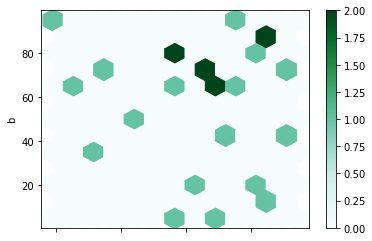

In [68]:
dfex.plot.hexbin(x='a', y='b', gridsize=12);

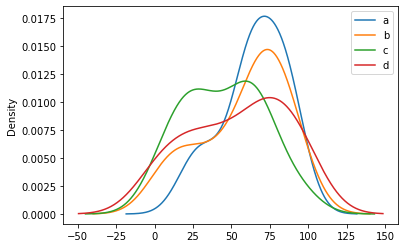

In [69]:
dfex.plot.kde();

<AxesSubplot:ylabel='Density'>

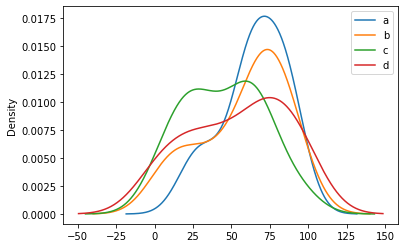

In [70]:
dfex.plot.density()